# Histogram Matching Implementation

This notebook demonstrates how to transform a source image (e.g., CT) so that its cumulative histogram matches that of a reference image (e.g., MRI).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image Loading and Preprocessing
Loading the images in grayscale and resizing them to a standard 512x512 resolution.

In [2]:
# Step 1: Read the source and reference images
source_img = cv2.imread('ct.png', cv2.IMREAD_GRAYSCALE)  # Image to be transformed
reference_img = cv2.imread('mri.png', cv2.IMREAD_GRAYSCALE)  # Image to match

source_img = cv2.resize(source_img, (512, 512))
reference_img = cv2.resize(reference_img, (512, 512))

# Step 2: Flatten images
source_flat = source_img.ravel()
reference_flat = reference_img.ravel()

### CDF Calculation and Lookup Table Generation
Computing the normalized Cumulative Distribution Function (CDF) and creating a mapping between the source and reference intensity levels.

In [3]:
# Step 3: Compute histogram and cumulative distribution function (CDF)
def cdf_hist(img_flat):
    hist, bins = np.histogram(img_flat, bins=256, range=[0,256])
    cdf = hist.cumsum()  # cumulative sum
    cdf_normalized = cdf * 255 / cdf[-1]  # normalize to [0,255]
    return cdf_normalized

cdf_source = cdf_hist(source_flat)
cdf_reference = cdf_hist(reference_flat)

# Step 4: Create a lookup table to match the source to reference
lookup_table = np.zeros(256, dtype=np.uint8)
for i in range(256):
    diff = np.abs(cdf_source[i] - cdf_reference)
    lookup_table[i] = np.argmin(diff)

### Applying Mapping and Visualization
Applying the Look-Up Table (LUT) to the source image and plotting the comparative results.

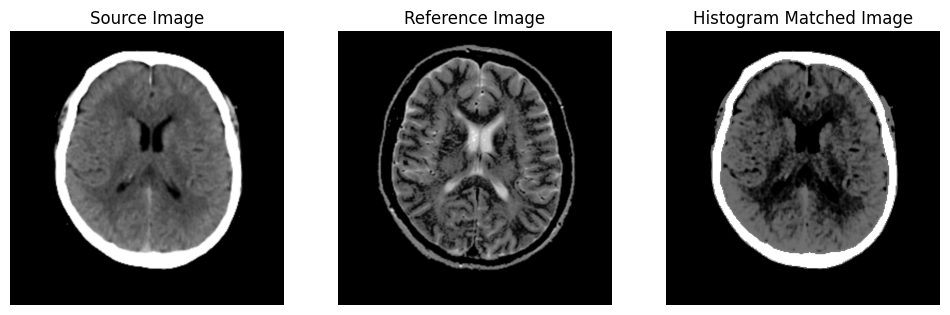

In [4]:
# Step 5: Apply the mapping to the source image
matched_img = cv2.LUT(source_img, lookup_table)

# Step 6: Plot the images
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('Source Image')
plt.imshow(source_img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Reference Image')
plt.imshow(reference_img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Histogram Matched Image')
plt.imshow(matched_img, cmap='gray')
plt.axis('off')

plt.show()